# Main 1 : Covid 19

The Evolution Of Covid 19 Active Cases In The World 
==>> Must Install Spark Environment (Apache Spark - Hadoop - SCala) And Add The Environment Variables (Windows 10)

In [2]:
from pyspark.sql import HiveContext
import pyspark
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from pyspark import SparkContext
sc =SparkContext.getOrCreate()

In [ ]:
cv = sc.textFile("covid19.csv")
cv.count()

In [ ]:
## fonction
def splitter(lineOfText): 
     words = lineOfText.split(" ") 
     return len(words) 
def aggregate(numWordsLine1, numWordsLineNext): 
     totalWords = numWordsLine1 + numWordsLineNext 
     return totalWords

In [ ]:
#Number of words
wordperline = cv.map(splitter)
totwords = wordperline.reduce(aggregate)
totwords

In [ ]:
cv.collect();

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("covid19.csv")

In [ ]:
#display part of the data 
df.show(5)

In [ ]:
#display the structure of the data
df.printSchema()

In [3]:
#we filter out the strings containing "China".
words_filter = cv.filter(lambda x: 'China' in x)
filtered = words_filter.collect()

print ("Fitered RDD -> %s" % (filtered))

NameError: name 'cv' is not defined

In [ ]:
# we form a key value pair and map every string with a value of Tunisia.
words_map = cv.map(lambda x: (x, 'Tunisia'))
mapping = words_map.collect()
print("Key value pair -> %s" % (mapping))

In [ ]:
#we can also check if the RDD is cached or not.
caching = cv.persist().is_cached 
print ( "Words got chached > %s" % (caching))

In [ ]:
#we can select and show the rows with select and the names of the features
#for example we can show Province compared with Confirmed
df.select('Province','Confirmed').show(10)

In [ ]:
#show data sorted by Last Update 
df.sort("Last_Update",ascending=False).show()			

In [16]:
# Countries With no deaths 
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
df.registerTempTable("Covid19")	#save the data as a table	
#display Country last updated at 2020-12-07 05:26:14 where Deaths are null.
countries_with_no_deaths= sqlContext.sql("SELECT Country FROM Covid19 where Last_Update like '2020-12-07 05:26:14' and  Deaths=0")
countries_with_no_deaths.show(10)

+--------------------+
|             Country|
+--------------------+
|              Bhutan|
|            Cambodia|
|            Dominica|
|             Eritrea|
|             Grenada|
|            Holy See|
|                Laos|
|    Marshall Islands|
|            Mongolia|
|Saint Kitts and N...|
+--------------------+
only showing top 10 rows



In [17]:
#Display total Confirmed Cases for each Last_Update Date
df_confirmed=sqlContext.sql("SELECT Last_Update, SUM(Confirmed) FROM Covid19 GROUP BY Last_Update").show()

+-------------------+--------------+
|        Last_Update|sum(Confirmed)|
+-------------------+--------------+
|2020-02-10T13:23:06|           213|
|2020-02-10T19:03:02|            61|
|2020-02-21T13:03:09|         62662|
|2020-03-08T06:53:04|           935|
|2020-03-15T06:53:03|            66|
|2020-08-16 04:27:42|      21478626|
|2020-02-11T09:23:04|           153|
|2020-02-17T15:43:02|            44|
|2020-02-20T23:13:05|           941|
|2020-02-25T02:23:05|            14|
|2020-02-26T23:53:01|           337|
|2020-03-02T22:33:09|            59|
|2020-03-07T17:53:03|           787|
|2020-03-08T19:53:03|           182|
|2020-03-09T10:53:03|          7161|
|2020-03-16T14:38:45|        104872|
|2020-03-20T21:13:29|           565|
|2020-09-09 04:28:48|      27603671|
|2020-02-02T00:43:02|            21|
|2020-02-03T23:13:11|            74|
+-------------------+--------------+
only showing top 20 rows



In [18]:
# Recovered cases statistics 
df.describe('Recovered').show()		

+-------+------------------+
|summary|         Recovered|
+-------+------------------+
|  count|            172472|
|   mean|21174.652483842907|
| stddev|116048.52433965524|
|    min|            -12684|
|    max|             99997|
+-------+------------------+



In [19]:
# Confirmed cases statistics 
df.describe('Confirmed').show()		

+-------+------------------+
|summary|         Confirmed|
+-------+------------------+
|  count|            172480|
|   mean| 33231.47196776438|
| stddev|103134.91456888027|
|    min|           -302844|
|    max|           2290891|
+-------+------------------+



In [20]:
# Active case cases statistics 
df.describe('Active_case').show()		

+-------+------------------+
|summary|       Active_case|
+-------+------------------+
|  count|            171287|
|   mean|11230.929632721689|
| stddev|113334.45902630518|
|    min|          -5624444|
|    max|           2089529|
+-------+------------------+



In [21]:
# Deaths cases statistics 
df.describe('Deaths').show()		

+-------+------------------+
|summary|            Deaths|
+-------+------------------+
|  count|            172480|
|   mean|1050.1350654019202|
| stddev|3499.4945979988124|
|    min|              -154|
|    max|              9996|
+-------+------------------+



In [22]:
#number of Covid Cases were Deaths > 1050.1350654019202(mean)
df.filter(df.Deaths>1050.1350654019202).count()

30810

In [23]:
#number of Covid Cases were Active Cases > 11230.929632721689(mean)
df.filter(df.Confirmed>11230.929632721689).count()

56893

In [24]:
#Covid Cases were Observation Date is in 2020
df.filter(df["ObservationDate"].endswith("2020")).show(10)

+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
|SNo|ObservationDate| Province|Country|    Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
|  1|     01/22/2020|    Anhui|  China|1/22/2020 17:00|        1|     0|        0|          1|
|  2|     01/22/2020|  Beijing|  China|1/22/2020 17:00|       14|     0|        0|         14|
|  3|     01/22/2020|Chongqing|  China|1/22/2020 17:00|        6|     0|        0|          6|
|  4|     01/22/2020|   Fujian|  China|1/22/2020 17:00|        1|     0|        0|          1|
|  5|     01/22/2020|    Gansu|  China|1/22/2020 17:00|        0|     0|        0|          0|
|  6|     01/22/2020|Guangdong|  China|1/22/2020 17:00|       26|     0|        0|         26|
|  7|     01/22/2020|  Guangxi|  China|1/22/2020 17:00|        2|     0|        0|          2|
|  8|     01/22/2020|  Guizhou|  China|1/22/2020 1

In [25]:
#Covid Cases in Tunisia
df.filter(df["Country"].contains("Tunisia")).show(10)

+----+---------------+--------+-------+-------------------+---------+------+---------+-----------+
| SNo|ObservationDate|Province|Country|        Last_Update|Confirmed|Deaths|Recovered|Active_case|
+----+---------------+--------+-------+-------------------+---------+------+---------+-----------+
|3376|     03/04/2020| Unknown|Tunisia|2020-03-04T01:33:07|        1|     0|        0|          1|
|3544|     03/05/2020| Unknown|Tunisia|2020-03-04T01:33:07|        1|     0|        0|          1|
|3733|     03/06/2020| Unknown|Tunisia|2020-03-04T01:33:07|        1|     0|        0|          1|
|3948|     03/07/2020| Unknown|Tunisia|2020-03-04T01:33:07|        1|     0|        0|          1|
|4149|     03/08/2020| Unknown|Tunisia|2020-03-08T21:13:10|        2|     0|        0|          2|
|4413|     03/09/2020| Unknown|Tunisia|2020-03-08T21:13:10|        2|     0|        0|          2|
|4652|     03/10/2020| Unknown|Tunisia|2020-03-10T05:13:07|        5|     0|        0|          5|
|4859|    

In [26]:
#Display Covid cases Province where Active_case > mean 
df1=df.groupby('Province').agg({'Active_case': 'mean'}).show(5)

+---------+------------------+
| Province|  avg(Active_case)|
+---------+------------------+
|     Utah|50439.606617647056|
|Cajamarca|12685.005181347151|
|  Antwerp|           65687.6|
|   Hawaii| 5903.775735294118|
|    Pasco|3445.2642487046633|
+---------+------------------+
only showing top 5 rows



In [27]:
#display Covid Cases where Observation Date is " 12/06/2020" and Country is "Tunisia"
df.filter("ObservationDate = '12/06/2020'").filter("Country = 'Tunisia'").show()

+------+---------------+--------+-------+-------------------+---------+------+---------+-----------+
|   SNo|ObservationDate|Province|Country|        Last_Update|Confirmed|Deaths|Recovered|Active_case|
+------+---------------+--------+-------+-------------------+---------+------+---------+-----------+
|171877|     12/06/2020| Unknown|Tunisia|2020-12-07 05:26:14|   104002|  3561|    76441|      24000|
+------+---------------+--------+-------+-------------------+---------+------+---------+-----------+



In [28]:
#display Covid Cases where Observation Date is " 12/06/2020" and Country is "Germany"
df.filter("ObservationDate = '12/06/2020'").filter("Country = 'Germany'").show()

+------+---------------+--------------------+-------+-------------------+---------+------+---------+-----------+
|   SNo|ObservationDate|            Province|Country|        Last_Update|Confirmed|Deaths|Recovered|Active_case|
+------+---------------+--------------------+-------+-------------------+---------+------+---------+-----------+
|171938|     12/06/2020|   Baden-Wurttemberg|Germany|2020-12-07 05:26:14|   166641|  3022|   120243|      43376|
|171946|     12/06/2020|              Bayern|Germany|2020-12-07 05:26:14|   231896|  4325|   171004|      56567|
|171949|     12/06/2020|              Berlin|Germany|2020-12-07 05:26:14|    71443|   683|    51095|      19665|
|171957|     12/06/2020|         Brandenburg|Germany|2020-12-07 05:26:14|    23724|   458|    17368|       5898|
|171958|     12/06/2020|              Bremen|Germany|2020-12-07 05:26:14|    10836|   137|     8936|       1763|
|172072|     12/06/2020|             Hamburg|Germany|2020-12-07 05:26:14|    26855|   423|    19

In [29]:
#Top Country with Most Confirmed Cases
sqlContext.sql("SELECT Province, Country FROM Covid19 order by Confirmed DESC").show(1)

+--------+-------+
|Province|Country|
+--------+-------+
| Unknown| France|
+--------+-------+
only showing top 1 row



In [30]:
#Top Country with Most Active cases
sqlContext.sql("SELECT Province, Country FROM Covid19 order by Active_case DESC").show(1)

+--------+-------+
|Province|Country|
+--------+-------+
| Unknown| France|
+--------+-------+
only showing top 1 row



In [31]:
#Top Country with Most Active cases
sqlContext.sql("SELECT Province, Country FROM Covid19 order by Active_case DESC").show(1)

+--------+-------+
|Province|Country|
+--------+-------+
| Unknown| France|
+--------+-------+
only showing top 1 row



In [32]:
#Print Total Confirmed Cases grouped by Countries and order by Active_case
sqlContext.sql("SELECT Country, SUM(Confirmed) as TotalConfirmed FROM Covid19  GROUP BY Country order by TotalConfirmed DESC").show()

+------------+--------------+
|     Country|TotalConfirmed|
+------------+--------------+
|          US|    1281678282|
|       India|     833624817|
|      Brazil|     711618065|
|      Russia|     224217320|
|      France|     145444435|
|       Spain|     141619421|
|          UK|     123052469|
|        Peru|     119805877|
|    Colombia|     117658640|
|      Mexico|     116314277|
|   Argentina|     109897576|
|       Italy|     103060174|
|South Africa|      99773691|
|        Iran|      89227101|
|     Germany|      80081689|
|       Chile|      77069030|
|      Turkey|      63832582|
|  Bangladesh|      56343725|
|Saudi Arabia|      55809862|
|    Pakistan|      55252882|
+------------+--------------+
only showing top 20 rows



In [33]:
#top 5 Province-Country where Confirmed > 2000000
sqlContext.sql("SELECT  Province,Country,Confirmed from Covid19 where Confirmed>2000000 order by Confirmed  DESC").show(5)

+--------+-------+---------+
|Province|Country|Confirmed|
+--------+-------+---------+
| Unknown| France|  2290891|
| Unknown| France|  2279869|
| Unknown| France|  2267019|
| Unknown| France|  2255912|
| Unknown| France|  2243251|
+--------+-------+---------+
only showing top 5 rows



In [34]:
#top 5 Province-Country where Deaths > 50000
sqlContext.sql("SELECT  Province,Country,Deaths from Covid19 where Deaths>50000 order by Deaths DESC").limit(5).show()

+--------+-------+------+
|Province|Country|Deaths|
+--------+-------+------+
| Unknown| France| 54804|
| Unknown| France| 54630|
| Unknown| France| 54416|
| Unknown| France| 53791|
| England|     UK| 53570|
+--------+-------+------+



In [35]:
df_cat_sum = df.groupby("Country").agg({'Confirmed': "sum"})
display(df_cat_sum)

DataFrame[Country: string, sum(Confirmed): bigint]

#  Charts : Covid19


+-------+--------------+
|Country|TotalConfirmed|
+-------+--------------+
|     US|    1281678282|
|  India|     833624817|
| Brazil|     711618065|
| Russia|     224217320|
| France|     145444435|
+-------+--------------+



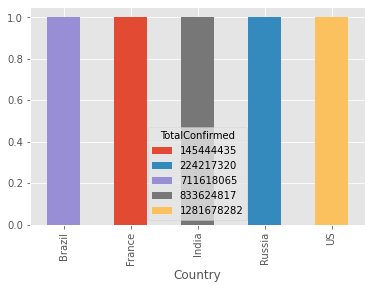

In [36]:

# Total Confirmed Cases grouped by Countries and order by Active_case

sqlContext.registerDataFrameAsTable(df, "data_table")

#df1=sqlContext.sql("SELECT Recovered,Deaths from Covid19 order by Deaths DESC").limit(10)

df1=sqlContext.sql("SELECT Country, SUM(Confirmed) as TotalConfirmed FROM Covid19  GROUP BY Country order by TotalConfirmed DESC").limit(5)

pdf1=df1.toPandas()


plt.style.use('ggplot')

pdf1.groupby(['Country', 'TotalConfirmed'])\
      .TotalConfirmed.count().unstack().plot.bar(legend=True, stacked=True)
df1.show()
plt.show()



+------------+------------------+------------------+
|     Country|       Mean_Deaths|    Mean_Confirmed|
+------------+------------------+------------------+
|   Argentina| 9896.408602150537| 393898.1218637993|
|South Africa| 8476.115523465704|360193.83032490977|
|        Iran|16748.715753424658|305572.26369863015|
|      Turkey| 5962.446494464944|235544.58302583024|
|  Bangladesh| 2875.784671532847|205634.03284671533|
+------------+------------------+------------------+



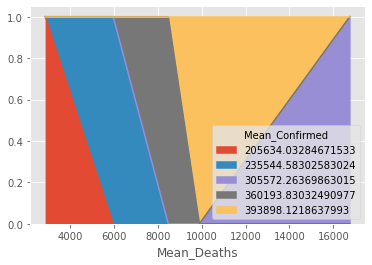

In [37]:
# Total Confirmed Cases grouped by Countries and order by Active_case

sqlContext.registerDataFrameAsTable(df, "data_table")

#df1=sqlContext.sql("SELECT Recovered,Deaths from Covid19 order by Deaths DESC").limit(10)

df1=sqlContext.sql("SELECT Country, MEAN(Deaths) as Mean_Deaths, MEAN(Confirmed) as Mean_Confirmed FROM Covid19  GROUP BY Country order by Mean_Confirmed DESC").limit(5)

pdf1=df1.toPandas()

df1.show()
plt.style.use('ggplot')

pdf1.groupby(['Mean_Deaths', 'Mean_Confirmed'])\
      .Mean_Confirmed.count().unstack().plot.area()

plt.show()

+------------+------------------+------------------+
|     Country|       Mean_Deaths|    Mean_Confirmed|
+------------+------------------+------------------+
|   Argentina| 9896.408602150537| 393898.1218637993|
|South Africa| 8476.115523465704|360193.83032490977|
|        Iran|16748.715753424658|305572.26369863015|
|      Turkey| 5962.446494464944|235544.58302583024|
|  Bangladesh| 2875.784671532847|205634.03284671533|
+------------+------------------+------------------+



ValueError: `dataset` input should have multiple elements.

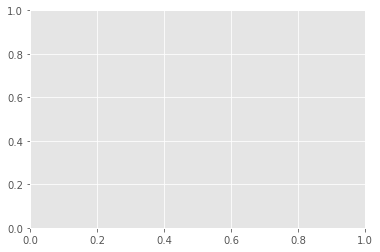

In [38]:
# Total Confirmed Cases grouped by Countries and order by Active_case

sqlContext.registerDataFrameAsTable(df, "data_table")

#df1=sqlContext.sql("SELECT Recovered,Deaths from Covid19 order by Deaths DESC").limit(10)

df1=sqlContext.sql("SELECT Country, MEAN(Deaths) as Mean_Deaths, MEAN(Confirmed) as Mean_Confirmed FROM Covid19  GROUP BY Country order by Mean_Confirmed DESC").limit(5)

pdf1=df1.toPandas()

df1.show()
plt.style.use('ggplot')

pdf1.groupby(['Mean_Deaths', 'Mean_Confirmed'])\
      .Mean_Confirmed.count().unstack().plot.kde()

plt.show()